## Predict the topics


#### 1. Problem Definition
In a statement,
The problem we will be  a topic modelling to understand the topics in the test data.

#### 2. Data
* All of the datasest values were collected from The Hindu website 
* Train data was collected from The hindu website by scraping 392 news on 24 september 2020 at 11:59 pm (https://www.thehindu.com/latest-news/).
* Test data was collected from The hindu website by scraping 156 news on 25 september 2020 at 3:00 pm (https://www.thehindu.com/latest-news/).                  




In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer, SnowballStemmer

## Data acquisition

In [2]:
# Reading the csv files
df_news = pd.read_csv(r'C:\Users\devanshu suri\Downloads\scrap_news.csv')
df_news

,Article Content
0,\nWith most of the public being dependent on t...
1,\nA 19-year-old Dalit girl from a village in H...
2,\nThe total number of containment zones in the...
3,\nThe Delhi High Court on Thursday asked the C...
4,\nPunjab Finance Minister Manpreet Singh Badal...
...,...
387,\nParley in ParliamentIt is sad that the quali...
388,"\nWhat do Germany, Taiwan and New Zealand have..."
389,\nThe United Nations has declared September 15...
390,"\nLeader of Opposition in the Delhi Assembly, ..."


In [3]:
# Display The head ==> To Check if Data is Properly Imported
df_news.head()

,Article Content
0,\nWith most of the public being dependent on t...
1,\nA 19-year-old Dalit girl from a village in H...
2,\nThe total number of containment zones in the...
3,\nThe Delhi High Court on Thursday asked the C...
4,\nPunjab Finance Minister Manpreet Singh Badal...


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_news.columns)
print("\n\nNumber of Features/Columns : ", len(df_news.columns))
print("\nNumber of Rows : ",len(df_news))
print("\n\nData Types :\n", df_news.dtypes)
print("sum of duplicated values{}\n".format(df_news.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_news.isnull().values.any())
print("\nTotal empty cells by column :\n", df_news.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['Article Content'], dtype='object')


Number of Features/Columns :  1

Number of Rows :  392


Data Types :
 Article Content    object
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 Article Content    0
dtype: int64 




## Data Preprocessing 

In [5]:
# Add number of characters column
df_news["char"] = df_news["Article Content"].apply(lambda x: len(x))
df_news.head()

,Article Content,char
0,\nWith most of the public being dependent on t...,2782
1,\nA 19-year-old Dalit girl from a village in H...,1389
2,\nThe total number of containment zones in the...,2042
3,\nThe Delhi High Court on Thursday asked the C...,789
4,\nPunjab Finance Minister Manpreet Singh Badal...,1862


In [6]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer("english")

def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # Remove (/n) from text
    text=re.sub("\n", "", text)

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize and stemming text
    text = [stemmer.stem(WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1]))) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_news["Article_Content_clean"] = df_news["Article Content"].apply(lambda x: clean_text(x))

### To clean textual data, call  custom 'clean_text' function that performs several transformations:

* lower the text
* remove next line(/n)
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this','is' etc.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet   lexical database
* lemmatize and stemming the text: transform every word into their root form.

In [7]:
# Lets see article content after cleaning the process
df_news["Article_Content_clean"].head()

0    public depend vehicl due fear possibl spread c...
1    year old dalit girl villag hathra district utt...
2    total number contain zone capit breach mark ad...
3    delhi high court thursday ask central bureau i...
4    punjab financ minist manpreet singh badal thur...
Name: Article_Content_clean, dtype: object

In [8]:
# Add number of characters column after cleaning the text
df_news["clean_chars_length"] = df_news["Article_Content_clean"].apply(lambda x: len(x))

# Add number of words column after cleaning the text
df_news["clean_words"] = df_news["Article_Content_clean"].apply(lambda x: len(x.split(" ")))

df_news.head()

,Article Content,char,Article_Content_clean,clean_chars_length,clean_words
0,\nWith most of the public being dependent on t...,2782,public depend vehicl due fear possibl spread c...,1488,242
1,\nA 19-year-old Dalit girl from a village in H...,1389,year old dalit girl villag hathra district utt...,820,129
2,\nThe total number of containment zones in the...,2042,total number contain zone capit breach mark ad...,1122,174
3,\nThe Delhi High Court on Thursday asked the C...,789,delhi high court thursday ask central bureau i...,531,81
4,\nPunjab Finance Minister Manpreet Singh Badal...,1862,punjab financ minist manpreet singh badal thur...,1157,186


In [9]:
 # Total length removal
print ('Origian Length', df_news.char.sum())
print ('Clean Length', df_news.clean_chars_length.sum())

Origian Length 759004
Clean Length 454789


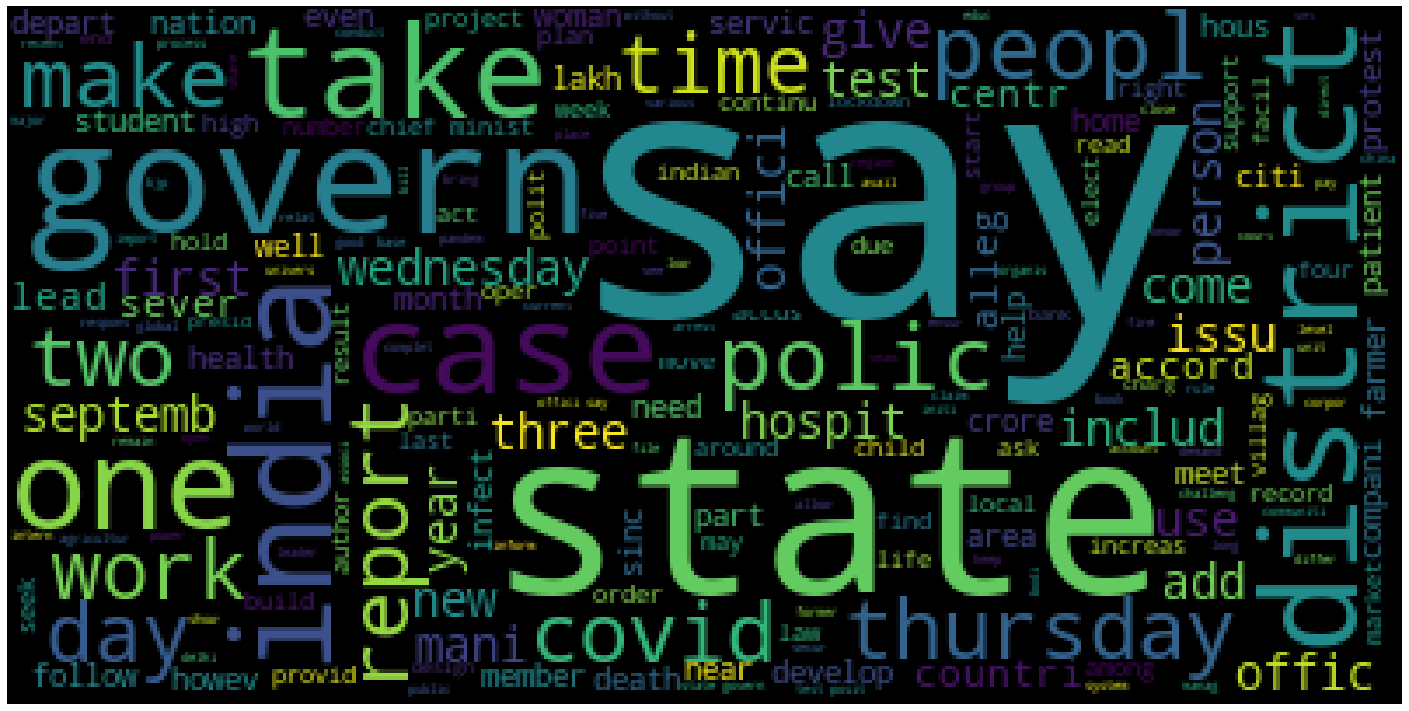

In [10]:
from wordcloud import WordCloud

wordcloud =  WordCloud(background_color="black").generate(' '.join(df_news["Article_Content_clean"]))
# Generate plot
plt.figure( figsize=(25,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [11]:
# Converting  dataframe to list
topics_docs = df_news['Article_Content_clean'].values.tolist()
topics_docs[0]

'public depend vehicl due fear possibl spread covid mani activ yet resum taxi driver auto rickshaw driver citi face bad day opt servic driver say yet recov financi hurdl caus lockdown tuesday work one passeng earn earlier cab driver use earn minimum per day work earn like dream come true say murali work ride share compani murali say car sanitis neat take precaut public use vehicl ask friend relat case need transport mani fear might infect would take time gain public trust follow safeti protocol without fail say similar raju auto rickshaw driver arilova say allow three passeng vehicl besid arrang transpar plastic sheet driver cabin passeng howev enough number passeng accord driver lack tourist adequ train bus cinema multiplex educ institut other impact incom main passeng student peopl theatr travel count half passeng hit money earn day suffici run famili hous rent vehicl emi fuel bill daili essenti cannot manag incom say lovaraju anoth auto rickshaw driver hanumanthuwaka cab driver also

In [12]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(topics_docs))

print(data_words[:2])

[['public', 'depend', 'vehicl', 'due', 'fear', 'possibl', 'spread', 'covid', 'mani', 'activ', 'yet', 'resum', 'taxi', 'driver', 'auto', 'rickshaw', 'driver', 'citi', 'face', 'bad', 'day', 'opt', 'servic', 'driver', 'say', 'yet', 'recov', 'financi', 'hurdl', 'caus', 'lockdown', 'tuesday', 'work', 'one', 'passeng', 'earn', 'earlier', 'cab', 'driver', 'use', 'earn', 'minimum', 'per', 'day', 'work', 'earn', 'like', 'dream', 'come', 'true', 'say', 'murali', 'work', 'ride', 'share', 'compani', 'murali', 'say', 'car', 'sanitis', 'neat', 'take', 'precaut', 'public', 'use', 'vehicl', 'ask', 'friend', 'relat', 'case', 'need', 'transport', 'mani', 'fear', 'might', 'infect', 'would', 'take', 'time', 'gain', 'public', 'trust', 'follow', 'safeti', 'protocol', 'without', 'fail', 'say', 'similar', 'raju', 'auto', 'rickshaw', 'driver', 'arilova', 'say', 'allow', 'three', 'passeng', 'vehicl', 'besid', 'arrang', 'transpar', 'plastic', 'sheet', 'driver', 'cabin', 'passeng', 'howev', 'enough', 'number', 'p

* With the help of Gensim’s simple_preprocess() we tokenise each sentence into a list of words it is kinda alternative of word tokenize

## Create the Dictionary and Corpus needed for Topic Modeling



In [16]:
# Building Dictionary 
dictionary = gensim.corpora.Dictionary(data_words)
print(dictionary)

Dictionary(9076 unique tokens: ['accord', 'activ', 'adequ', 'allow', 'also']...)


In [17]:
#remove rare and repeatative words
dictionary.filter_extremes(no_below=2, no_above=0.3, keep_n=100000)

### Filter out tokens that appear in
>  * less than 5 documents
>  * more than 0.5 documents (fraction of total corpus size, not absolute number).
>  * after the above two steps, keep only the first 100000 most frequent tokens.

In [18]:
print (dictionary)

Dictionary(4128 unique tokens: ['accord', 'activ', 'adequ', 'allow', 'anoth']...)


In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]
bow_corpus[0]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 4),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 4),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 9),
 (25, 2),
 (26, 1),
 (27, 4),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 2),
 (34, 1),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 3),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 2),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 2),
 (54, 2),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 2),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 2),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 3),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 7),
 (84, 2),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 3),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 2),
 (98, 1),
 (99, 1),
 (100, 1),

* Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
* words and how many times those words appear. Save this to 'bow_corpus'

In [20]:
#preview 
document_num = 10
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 17 ("come") appears 1 time.
Word 39 ("follow") appears 1 time.
Word 44 ("good") appears 1 time.
Word 55 ("infect") appears 1 time.
Word 90 ("protocol") appears 1 time.
Word 148 ("care") appears 2 time.
Word 248 ("minist") appears 5 time.
Word 258 ("posit") appears 5 time.
Word 274 ("week") appears 1 time.
Word 275 ("well") appears 1 time.
Word 309 ("vika") appears 1 time.
Word 334 ("develop") appears 1 time.
Word 648 ("sanjay") appears 1 time.
Word 654 ("abdul") appears 1 time.
Word 655 ("aghadi") appears 1 time.
Word 656 ("ashok") appears 1 time.
Word 657 ("bless") appears 1 time.
Word 658 ("cabinet") appears 2 time.
Word 659 ("check") appears 1 time.
Word 660 ("contact") appears 1 time.
Word 661 ("contract") appears 1 time.
Word 662 ("coronavirus") appears 2 time.
Word 663 ("cours") appears 1 time.
Word 664 ("everyon") appears 1 time.
Word 665 ("fourth") appears 1 time.
Word 666 ("gaikwad") appears 1 time.
Word 667 ("jitendra") appears 1 time.
Word 668 ("leader") appears 1 time.

In [22]:
#Building LDA Topic Model

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   random_state=100,
                                   workers = 2,
                                   chunksize=100,
                                   per_word_topics=True)

In [23]:
#Article - Topic Distribution for first Article
def get_article_topic_distribution(article):
    return lda_model.get_document_topics(article)
#Returns a list containing a list of tuple
#Each inner list corresponds to an article and each tuple refers to topicID and its corresponding probability  
map(get_article_topic_distribution, bow_corpus)

In [24]:
#The LDA model(lda_model) we have created above can be used to view the topics from the documents. It can be done with the help of following script 
lda_model.print_topics()


[(0,
  '0.011*"border" + 0.008*"minist" + 0.008*"polic" + 0.008*"forc" + 0.008*"chines" + 0.007*"alleg" + 0.007*"offici" + 0.007*"china" + 0.007*"secur" + 0.007*"area"'),
 (1,
  '0.009*"work" + 0.009*"countri" + 0.007*"time" + 0.006*"drug" + 0.005*"india" + 0.005*"actor" + 0.005*"singh" + 0.005*"sushant" + 0.005*"design" + 0.005*"court"'),
 (2,
  '0.009*"depart" + 0.008*"villag" + 0.008*"district" + 0.008*"test" + 0.008*"record" + 0.007*"stadium" + 0.007*"posit" + 0.007*"area" + 0.006*"hospit" + 0.006*"health"'),
 (3,
  '0.012*"vaccin" + 0.010*"trial" + 0.009*"maratha" + 0.008*"minist" + 0.006*"doctor" + 0.006*"surgeri" + 0.006*"play" + 0.005*"time" + 0.005*"lung" + 0.005*"heart"'),
 (4,
  '0.034*"death" + 0.027*"report" + 0.024*"test" + 0.024*"total" + 0.022*"district" + 0.018*"activ" + 0.015*"toll" + 0.014*"talli" + 0.014*"patient" + 0.013*"new"'),
 (5,
  '0.009*"trump" + 0.008*"compani" + 0.006*"crore" + 0.006*"new" + 0.006*"vote" + 0.005*"alleg" + 0.005*"china" + 0.005*"use" + 0.00

## Compute Model Perplexity and Coherence Score



In [25]:
from gensim.models import CoherenceModel
from gensim import models

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.818996683691116

Coherence Score:  0.36185539467965117


* The LDA model (lda_model) we have created above can be used to compute the model’s perplexity, i.e. how good the model is. The lower the score the better the model will be.
* Coherence score is the average /median of the pairwise word-similarity scores of the words in the topic.If it is greater model works well .

## Hyperparameter Tuning

In [48]:
#  function to find best coherence scrore for a  model
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,#Document-Topic Density
                                           eta=b,#Word-Topic Density
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [58]:
#Let’s call the compute_coherence_values function, and iterate it over the range of topics, alpha, and beta parameter values
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, int(num_of_docs*0.75)),bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    # Saving all the values to csv files.
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()









  0%|                                                                                          | 0/540 [00:00<?, ?it/s]







  0%|▏                                                                               | 1/540 [00:14<2:07:32, 14.20s/it]







  0%|▎                                                                               | 2/540 [00:28<2:07:44, 14.25s/it]







  1%|▍                                                                               | 3/540 [00:42<2:05:33, 14.03s/it]







  1%|▌                                                                               | 4/540 [00:54<2:01:02, 13.55s/it]







  1%|▋                                                                               | 5/540 [01:07<2:00:33, 13.52s/it]







  1%|▉                                                                               | 6/540 [01:20<1:57:28, 13.20s/it]







  1%|█                                                                               | 7/540 [01:32<1:5

 12%|█████████▎                                                                     | 64/540 [13:32<1:37:42, 12.32s/it]







 12%|█████████▌                                                                     | 65/540 [13:45<1:37:53, 12.37s/it]







 12%|█████████▋                                                                     | 66/540 [13:57<1:37:56, 12.40s/it]







 12%|█████████▊                                                                     | 67/540 [14:10<1:37:50, 12.41s/it]







 13%|█████████▉                                                                     | 68/540 [14:22<1:37:48, 12.43s/it]







 13%|██████████                                                                     | 69/540 [14:35<1:38:21, 12.53s/it]







 13%|██████████▏                                                                    | 70/540 [14:47<1:37:55, 12.50s/it]







 13%|██████████▍                                                                    | 71/540 [15:00<1:37:40, 12

 24%|██████████████████▍                                                           | 128/540 [27:07<1:25:30, 12.45s/it]







 24%|██████████████████▋                                                           | 129/540 [27:19<1:25:01, 12.41s/it]







 24%|██████████████████▊                                                           | 130/540 [27:32<1:24:38, 12.39s/it]







 24%|██████████████████▉                                                           | 131/540 [27:44<1:24:56, 12.46s/it]







 24%|███████████████████                                                           | 132/540 [27:57<1:25:00, 12.50s/it]







 25%|███████████████████▏                                                          | 133/540 [28:09<1:24:52, 12.51s/it]







 25%|███████████████████▎                                                          | 134/540 [28:22<1:24:44, 12.52s/it]







 25%|███████████████████▌                                                          | 135/540 [28:35<1:24:33, 12

 36%|███████████████████████████▋                                                  | 192/540 [40:19<1:12:33, 12.51s/it]







 36%|███████████████████████████▉                                                  | 193/540 [40:31<1:12:32, 12.54s/it]







 36%|████████████████████████████                                                  | 194/540 [40:44<1:12:25, 12.56s/it]







 36%|████████████████████████████▏                                                 | 195/540 [40:56<1:11:54, 12.50s/it]







 36%|████████████████████████████▎                                                 | 196/540 [41:08<1:11:10, 12.42s/it]







 36%|████████████████████████████▍                                                 | 197/540 [41:21<1:10:46, 12.38s/it]







 37%|████████████████████████████▌                                                 | 198/540 [41:33<1:11:23, 12.52s/it]







 37%|████████████████████████████▋                                                 | 199/540 [41:46<1:11:06, 12

 47%|█████████████████████████████████████▉                                          | 256/540 [53:29<58:44, 12.41s/it]







 48%|██████████████████████████████████████                                          | 257/540 [53:42<58:39, 12.44s/it]







 48%|██████████████████████████████████████▏                                         | 258/540 [53:54<58:18, 12.41s/it]







 48%|█████████████████████████████████████▍                                        | 259/540 [54:09<1:00:58, 13.02s/it]







 48%|█████████████████████████████████████▌                                        | 260/540 [54:22<1:00:49, 13.03s/it]







 48%|█████████████████████████████████████▋                                        | 261/540 [54:35<1:01:35, 13.25s/it]







 49%|█████████████████████████████████████▊                                        | 262/540 [54:48<1:00:39, 13.09s/it]







 49%|█████████████████████████████████████▉                                        | 263/540 [55:01<1:00:18, 13

 59%|██████████████████████████████████████████████▏                               | 320/540 [1:07:19<46:49, 12.77s/it]







 59%|██████████████████████████████████████████████▎                               | 321/540 [1:07:31<46:20, 12.70s/it]







 60%|██████████████████████████████████████████████▌                               | 322/540 [1:07:44<45:53, 12.63s/it]







 60%|██████████████████████████████████████████████▋                               | 323/540 [1:07:57<46:05, 12.75s/it]







 60%|██████████████████████████████████████████████▊                               | 324/540 [1:08:10<46:18, 12.86s/it]







 60%|██████████████████████████████████████████████▉                               | 325/540 [1:08:23<46:20, 12.93s/it]







 60%|███████████████████████████████████████████████                               | 326/540 [1:08:36<46:10, 12.95s/it]







 61%|███████████████████████████████████████████████▏                              | 327/540 [1:08:49<46:25, 13

 71%|███████████████████████████████████████████████████████▍                      | 384/540 [1:28:51<55:52, 21.49s/it]







 71%|███████████████████████████████████████████████████████▌                      | 385/540 [1:29:12<55:39, 21.54s/it]







 71%|███████████████████████████████████████████████████████▊                      | 386/540 [1:29:34<55:42, 21.70s/it]







 72%|███████████████████████████████████████████████████████▉                      | 387/540 [1:29:55<54:53, 21.53s/it]







 72%|████████████████████████████████████████████████████████                      | 388/540 [1:30:16<53:25, 21.09s/it]







 72%|████████████████████████████████████████████████████████▏                     | 389/540 [1:30:36<52:34, 20.89s/it]







 72%|████████████████████████████████████████████████████████▎                     | 390/540 [1:30:57<52:18, 20.92s/it]







 72%|████████████████████████████████████████████████████████▍                     | 391/540 [1:31:17<51:28, 20

 83%|████████████████████████████████████████████████████████████████▋             | 448/540 [1:51:22<23:03, 15.04s/it]







 83%|████████████████████████████████████████████████████████████████▊             | 449/540 [1:51:35<21:48, 14.38s/it]







 83%|█████████████████████████████████████████████████████████████████             | 450/540 [1:51:48<20:50, 13.90s/it]







 84%|█████████████████████████████████████████████████████████████████▏            | 451/540 [1:52:00<20:01, 13.50s/it]







 84%|█████████████████████████████████████████████████████████████████▎            | 452/540 [1:52:14<19:44, 13.46s/it]







 84%|█████████████████████████████████████████████████████████████████▍            | 453/540 [1:52:27<19:26, 13.41s/it]







 84%|█████████████████████████████████████████████████████████████████▌            | 454/540 [1:52:40<19:10, 13.37s/it]







 84%|█████████████████████████████████████████████████████████████████▋            | 455/540 [1:52:53<18:43, 13

 95%|█████████████████████████████████████████████████████████████████████████▉    | 512/540 [2:05:36<06:07, 13.14s/it]







 95%|██████████████████████████████████████████████████████████████████████████    | 513/540 [2:05:49<05:53, 13.08s/it]







 95%|██████████████████████████████████████████████████████████████████████████▏   | 514/540 [2:06:02<05:38, 13.03s/it]







 95%|██████████████████████████████████████████████████████████████████████████▍   | 515/540 [2:06:15<05:26, 13.05s/it]







 96%|██████████████████████████████████████████████████████████████████████████▌   | 516/540 [2:06:29<05:14, 13.12s/it]







 96%|██████████████████████████████████████████████████████████████████████████▋   | 517/540 [2:06:44<05:13, 13.65s/it]







 96%|██████████████████████████████████████████████████████████████████████████▊   | 518/540 [2:06:58<05:02, 13.77s/it]







 96%|██████████████████████████████████████████████████████████████████████████▉   | 519/540 [2:07:11<04:49, 13

In [61]:
# Let’s train the final model using the above selected parameters
lda_model_tune = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9099)

In [62]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tune.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda_model_tune, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.7217062530983185

Coherence Score:  0.38963078870681944


### Visualising the Topics-Keywords


In [63]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis


C:\Users\devanshu suri\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
C:\Users\devanshu suri\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.007849  0.077397       1        1  22.077808
2      0.070590  0.008768       2        1  17.042610
1     -0.030441 -0.005017       3        1  11.339888
9     -0.032114  0.012143       4        1  10.009327
4      0.050804 -0.017052       5        1   8.332146
7     -0.003771  0.009828       6        1   7.878906
5     -0.015584 -0.017040       7        1   6.446861
3     -0.014363 -0.037558       8        1   5.909160
8     -0.013064 -0.021658       9        1   5.644146
0     -0.004208 -0.009811      10        1   5.319145, topic_info=     Category        Freq      Term       Total  loglift  logprob
11    Default  107.000000      bill  107.000000  30.0000  30.0000
339   Default   85.000000    farmer   85.000000  29.0000  29.0000
222   Default  103.000000     death  103.000000  28.0000  28.0000
182   Default  174.000000     polic  174.000000  27.0000  27.0000
264   Default  145.000000    report  145.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
220   Topic10    5.398823     chief   86.073151   0.1648  -6.3339
304   Topic10    4.793499   respons   38.127155   0.8602  -6.4528
1898  Topic10    4.876077  ministri   46.307003   0.6829  -6.4357
363   Topic10    4.904708     place   57.014744   0.4807  -6.4299
633   Topic10    4.956017    includ  103.927452  -0.1092  -6.4195

[604 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3659      1  0.073099  abraham
3659      2  0.219296  abraham
3659      3  0.511691  abraham
3659      4  0.073099  abraham
3659      5  0.073099  abraham
...     ...       ...      ...
278       4  0.071483     zone
278       5  0.071483     zone
278       6  0.071483     zone
278       7  0.035742     zone
278      10  0.142967     zone

[3648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 2, 10, 5, 8, 6, 4, 9, 1])

* The LDA model (lda_model)  used to examine the produced topics and the associated keywords. It can be visualised by using pyLDAvispackage
* From the above output, the bubbles on the left-side represents a topic and larger the bubble, the more prevalent is that topic. The topic model will be good if the topic model has big, non-overlapping bubbles scattered throughout the chart

## Lets test the test dataset

In [65]:
# Reading the test csv files
df_news_test = pd.read_csv(r'C:\Users\devanshu suri\Downloads\scrap_news_test.csv')
df_news_test

,Article Content
0,\nMaduravoyal Police have arrested an advocate...
1,"\nLet’s just say that after the minimalist, wh..."
2,\n The CAG has found that the Union government...
3,\n Political leaders cutting across party line...
4,\n Two men died after allegedly consuming adul...
...,...
151,\nThe district reported 425 new COVID -19 case...
152,\nOpposition strategyThough the passage of the...
153,"\nThe mystic, celestial snow lion, ‘Gang Seng ..."
154,\nHealth facilities are a place of healing and...


In [67]:
# Lets clean the test data
df_news_test["Article_Content_clean_test"] = df_news_test["Article Content"].apply(lambda x: clean_text(x))
df_news_test.head()

,Article Content,Article_Content_clean_test
0,\nMaduravoyal Police have arrested an advocate...,maduravoy polic arrest advoc ravi abscond alle...
1,"\nLet’s just say that after the minimalist, wh...",let say minimalist white scheme late digit sto...
2,\n The CAG has found that the Union government...,cag find union govern first two year gst imple...
3,\n Political leaders cutting across party line...,polit leader cut across parti line condol deat...
4,\n Two men died after allegedly consuming adul...,two men die alleg consum adulter arrack kinapa...


In [72]:
# Converting  dataframe to list
topics_docs_test = df_news_test['Article_Content_clean_test'].values.tolist()
# call above function sent_to_words
data_words_test = list(sent_to_words(topics_docs_test))
# Creating corpous
bow_corpus_test = [dictionary.doc2bow(doc) for doc in data_words_test]

In [100]:
for index, score in sorted(lda_model_tune[bow_corpus_test[140]]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tune.print_topic(index, 10)))

Score: 0.13870684802532196	 Topic: 0.004*"time" + 0.004*"work" + 0.003*"india" + 0.003*"countri" + 0.003*"court" + 0.003*"bjp" + 0.003*"like" + 0.003*"design" + 0.003*"drug" + 0.003*"bihar"
Score: 0.762213408946991	 Topic: 0.010*"polic" + 0.005*"court" + 0.005*"member" + 0.005*"district" + 0.004*"leader" + 0.004*"minist" + 0.004*"parti" + 0.004*"alleg" + 0.004*"accus" + 0.003*"protest"
Score: 0.09879858046770096	 Topic: 0.005*"school" + 0.004*"tamil" + 0.003*"nadu" + 0.003*"corpor" + 0.003*"student" + 0.003*"person" + 0.003*"right" + 0.003*"court" + 0.002*"woman" + 0.002*"minist"
